In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Zdroj kódu

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

In [2]:
df = pd.read_csv("datasety/archive3/winequality-red.csv")

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Prememné

## Nezávislé

**fixed acidity:**       most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  typically ranges from 4.5 to 8.5 g/L 

**volatile acidity:**    the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  the upper limit for regular still wines is 1.2 g/L in acetic acid equivalent, and for extremely sweet wines like noble rot wines, it is 2.1 g/L.

**citric acid:**         found in small quantities, citric acid can add 'freshness' and flavor to wines   range of 0.1 to 0.7 g/L 

**residual sugar:**      the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet   
    
**chlorides:**           the amount of salt in the wine range 20mg/L - 500mg/L, some wines can have more

**free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine Free SO₂ levels typically range from 25-50 mg/L, 70-90 can also be.

**total sulfur dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. Upper limit is around 150 - 400
    
**density:**             the density of water is close to that of water depending on the percent alcohol and sugar content      

**pH:**                  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**sulphates:**           a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant   range is 5 mg/L - 400mg/L In Eu legal up to 2.5 g/L            
**alcohol:**             

# Závislá 

**quality:**             (score between 0 and 10)            


In [4]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

fixed acidity              Axes(0.125,0.712609;0.227941x0.167391)
volatile acidity        Axes(0.398529,0.712609;0.227941x0.167391)
citric acid             Axes(0.672059,0.712609;0.227941x0.167391)
residual sugar             Axes(0.125,0.511739;0.227941x0.167391)
chlorides               Axes(0.398529,0.511739;0.227941x0.167391)
free sulfur dioxide     Axes(0.672059,0.511739;0.227941x0.167391)
total sulfur dioxide        Axes(0.125,0.31087;0.227941x0.167391)
density                  Axes(0.398529,0.31087;0.227941x0.167391)
pH                       Axes(0.672059,0.31087;0.227941x0.167391)
sulphates                      Axes(0.125,0.11;0.227941x0.167391)
alcohol                     Axes(0.398529,0.11;0.227941x0.167391)
quality                     Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

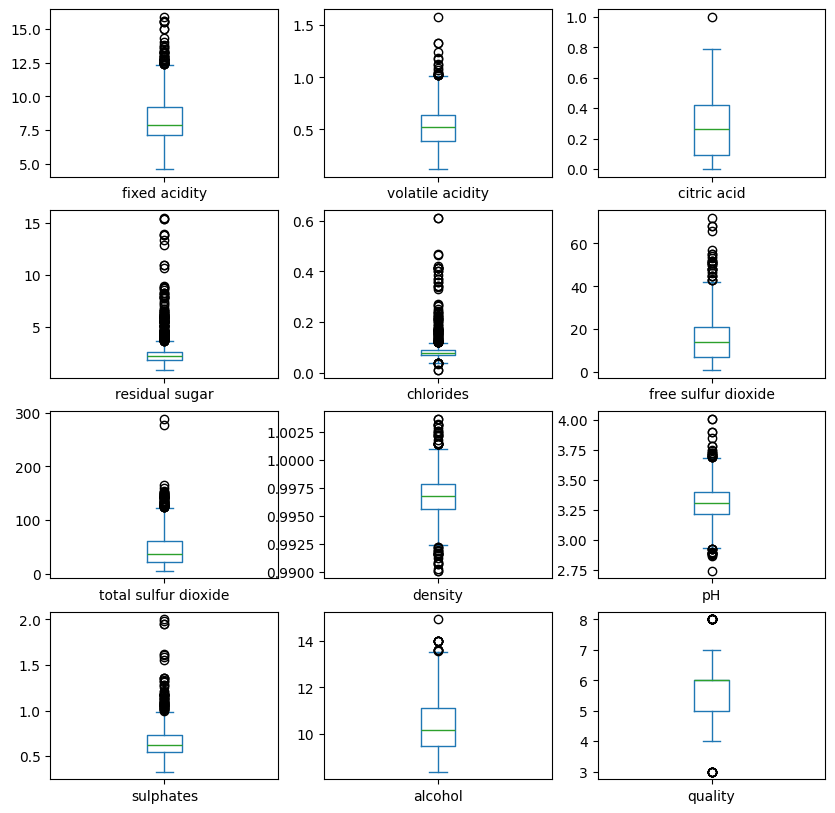

In [5]:
df.plot(kind = "box", subplots= True, layout = (4,3), figsize = (10,10))

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

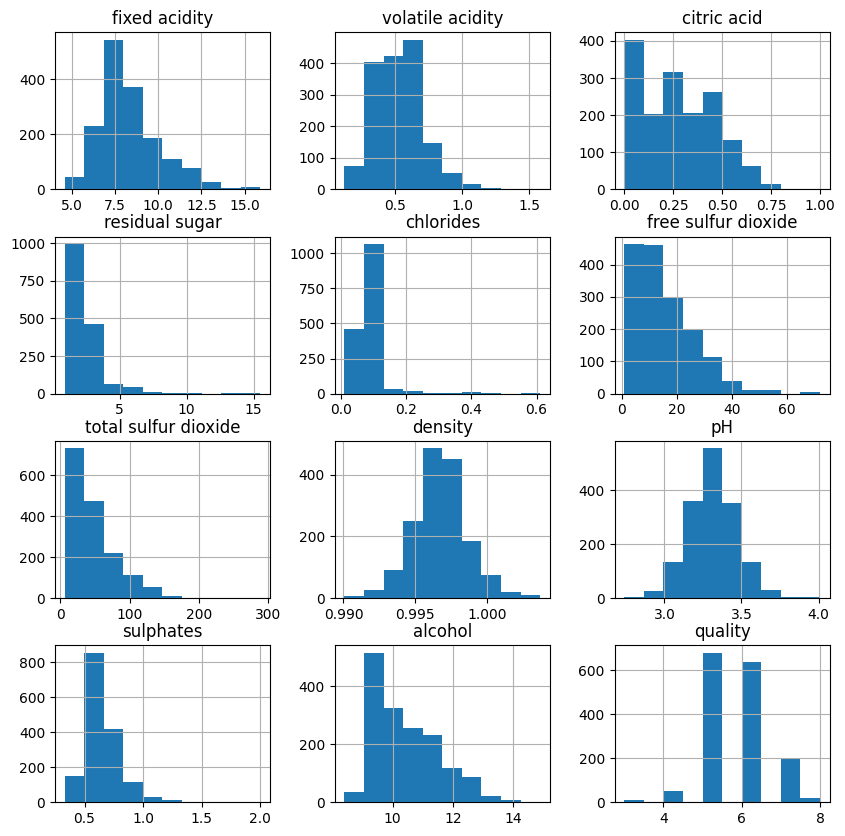

In [6]:
df.hist(figsize = (10,10))

In [7]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


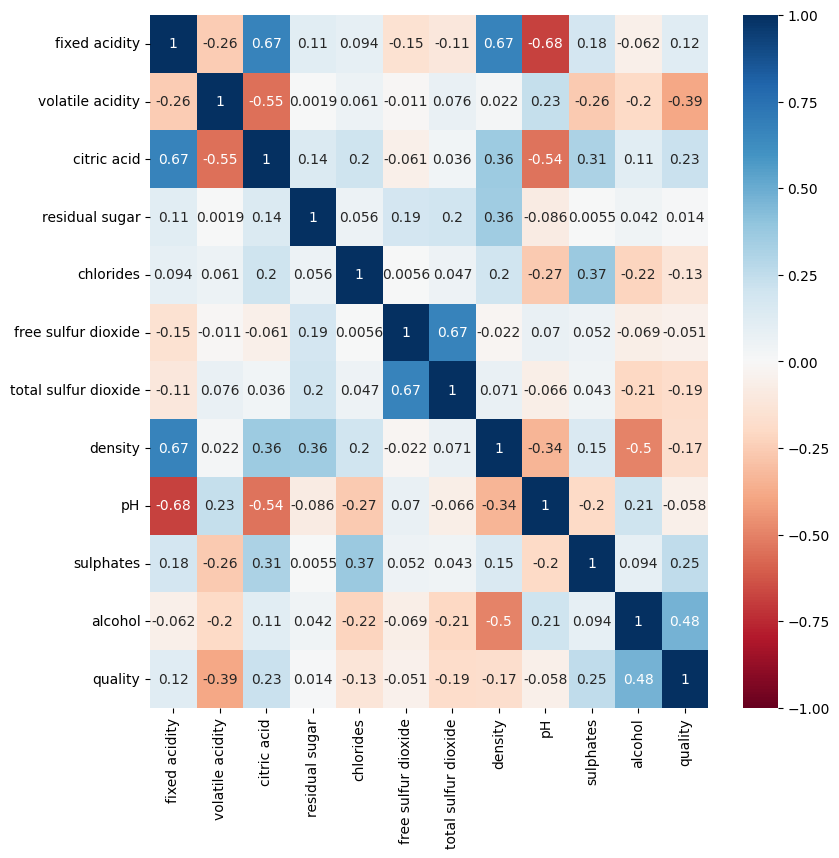

In [8]:
plt.figure(figsize = (9,9))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [9]:
# najhorsie korelacie
df_wine_X = df.drop(columns=["quality"])
df_wine_X
corr_matrix = df_wine_X.corr().abs() # Use absolute values
upper_triangle_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_triangle_corr = corr_matrix.where(upper_triangle_mask)
corr_series = upper_triangle_corr.stack().dropna()
top_correlations = corr_series.sort_values(ascending=False).head(10)
print(f'Najsilnejšie absolútne  korelácie:\n{top_correlations}')

Najsilnejšie absolútne  korelácie:
fixed acidity        pH                      0.682978
                     citric acid             0.671703
                     density                 0.668047
free sulfur dioxide  total sulfur dioxide    0.667666
volatile acidity     citric acid             0.552496
citric acid          pH                      0.541904
density              alcohol                 0.496180
chlorides            sulphates               0.371260
citric acid          density                 0.364947
residual sugar       density                 0.355283
dtype: float64


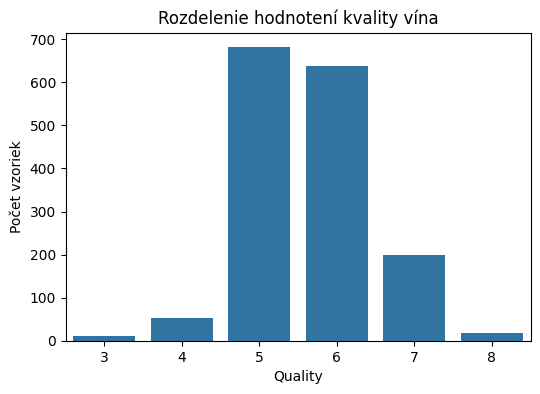

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Rozdelenie hodnotení kvality vína")
plt.xlabel("Quality")
plt.ylabel("Počet vzoriek")
plt.show()

Z grafu je vidieť, že väčšina vzoriek má stredné hodnotenia kvality – najviac vín je ohodnotených známkou 5 a 6. Vyššie hodnotenia (7 a 8) a veľmi nízke hodnotenia (3 a 4) sa vyskytujú podstatne menej často. Dataset je teda výrazne koncentrovaný v strede škály a extrémne kvalitné alebo veľmi nekvalitné vína sú zastúpené len málo

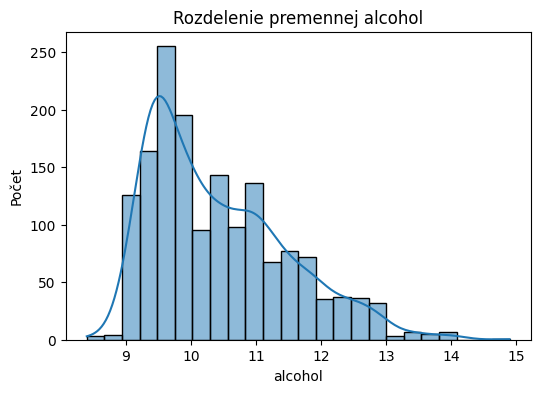

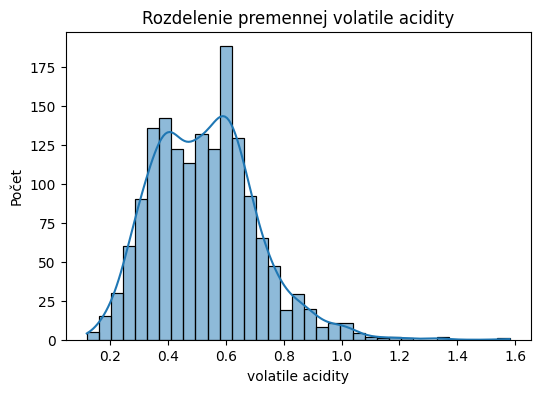

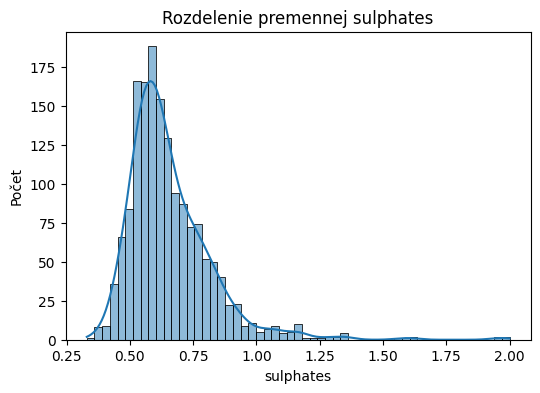

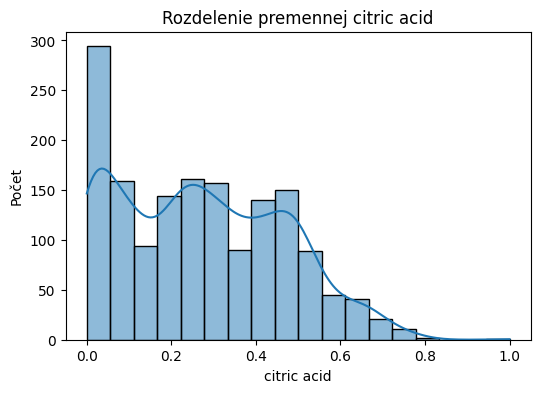

In [11]:
cols = ["alcohol", "volatile acidity", "sulphates", "citric acid"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Rozdelenie premennej {col}")
    plt.xlabel(col)
    plt.ylabel("Počet")
    plt.show()

V prvom grafe vidíme, že väčšina vín má obsah alkoholu približne medzi 9 % a 11,5 %, pričom najčastejšie sa vyskytujú hodnoty okolo 9,5–10 %. Rozdelenie je mierne zošikmené doprava – vyššie hodnoty alkoholu (nad 12–13 %) sú pomerne zriedkavé. To naznačuje, že veľmi silné vína sú v súbore skôr výnimkou a typické víno v datasete má skôr stredný obsah alkoholu. Druhý graf nám ukazuje, že väčšina vín má prchavú kyslosť približne v intervale od 0,3 do 0,7, pričom najčastejšie sa vyskytujú hodnoty okolo 0,5–0,6. Rozdelenie je mierne zošikmené doprava – vyššie hodnoty (nad 1,0) sa vyskytujú len výnimočne. To znamená, že extrémne vysoká prchavá kyslosť je skôr raritná a typické víno v datasete má strednú úroveň tejto premennej. Z tretieho grafu usudzujeme, že väčšina vín má obsah síranov približne medzi 0,4 a 0,8, pričom najčastejšie sa vyskytujú hodnoty okolo 0,6. Rozdelenie je výrazne zošikmené doprava – vyššie hodnoty (nad 1,0) sú skôr zriedkavé. To znamená, že extrémne vysoký obsah síranov je v súbore výnimkou a typické víno má skôr strednú úroveň tejto premennej. Na štvtom grafe vidíme, že veľmi veľa vín má len veľmi nízky obsah kyseliny citrónovej, prípadne hodnoty blízke nule – ľavá časť grafu je najvyššia. Väčšina pozorovaní sa nachádza pod hodnotou približne 0,5, vyššie hodnoty (nad 0,6–0,7) sú skôr výnimočné. Rozdelenie je teda výrazne zošikmené doprava a naznačuje, že typické víno v datasete má skôr nízky až stredný obsah kyseliny citrónovej, zatiaľ čo vysoké hodnoty sa vyskytujú len zriedkavo.

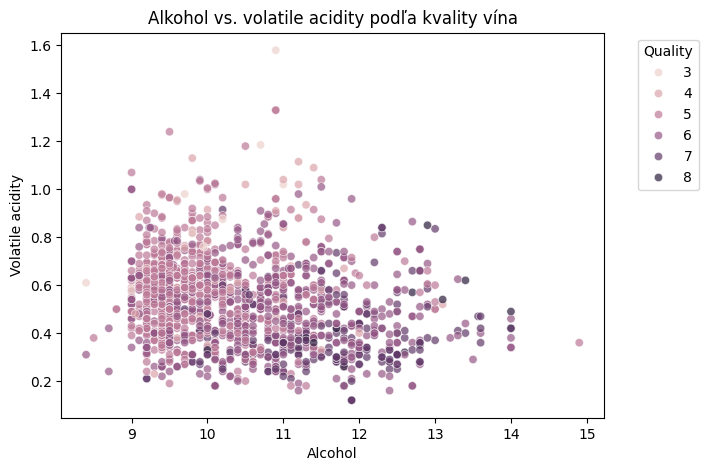

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="alcohol",
    y="volatile acidity",
    hue="quality",
    data=df,
    alpha=0.7
)
plt.title("Alkohol vs. volatile acidity podľa kvality vína")
plt.xlabel("Alcohol")
plt.ylabel("Volatile acidity")
plt.legend(title="Quality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Z daného grafu je vidieť, ako spolu súvisia dve kľúčové premenné – obsah alkoholu a prchavá kyslosť – a zároveň, ako sa v tomto priestore rozkladajú jednotlivé triedy kvality vína. Body nevytvárajú úplne náhodný oblak, ale naznačujú skôr negatívny vzťah medzi týmito dvoma premennými: pri vyššom obsahu alkoholu sa väčšina vín nachádza pri nižších hodnotách prchavej kyslosti, zatiaľ čo pri nižšom alkohole sa častejšie vyskytujú vyššie hodnoty volatile acidity. Silnejšie vína tak majú skôr miernejšiu prchavú kyslosť, zatiaľ čo vyššia prchavá kyslosť je typickejšia pre slabšie vína.
Farebné odlíšenie podľa kvality ukazuje, že kvalita nie je v tomto priestore rozložená rovnomerne. Vína s vyšším hodnotením (7–8) sa koncentrujú najmä v oblasti vyššieho obsahu alkoholu (približne 11–13 %) a zároveň nižšej až strednej prchavej kyslosti (okolo 0,2–0,6). Naopak, vína s nižšou kvalitou (3–4) sa častejšie objavujú v kombinácii nižšieho alkoholu a vyššej prchavej kyslosti, neraz s hodnotami volatile acidity nad 0,6. Stredné hodnotenia kvality (5–6), ktorých je najviac, vypĺňajú veľkú časť stredu grafu a prekrývajú široký rozsah oboch premenných, čo naznačuje, že hranice medzi triedami kvality nie sú ostré, najmä v strede škály.
Z pohľadu interpretácie to znamená, že obsah alkoholu a prchavá kyslosť sú potenciálne dôležité indikátory kvality vína – vyšší alkohol a nižšia prchavá kyslosť sú typickejšie pre kvalitnejšie vína, zatiaľ čo opačná kombinácia je častejšia pri menej kvalitných. Zároveň však existuje pomerne veľké prekrytie medzi triedami, najmä medzi kvalitou 5 a 6, takže tieto dve premenné samostatne pravdepodobne nebudú stačiť na úplne presnú klasifikáciu, ale tvoria silný signál, ktorý by mal výrazne pomôcť pri modelovaní kvality vína.

===== Logistická regresia =====
Accuracy (test): 0.740625

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       149
           1       0.77      0.74      0.75       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion matrix:
 [[111  38]
 [ 45 126]]


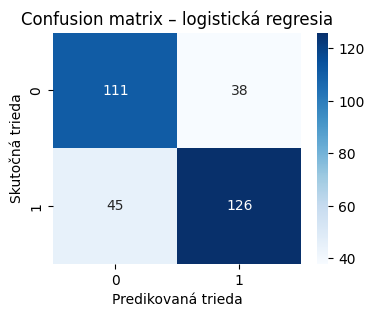


===== Random Forest =====
Accuracy (test): 0.809375

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       149
           1       0.83      0.81      0.82       171

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320

Confusion matrix:
 [[121  28]
 [ 33 138]]


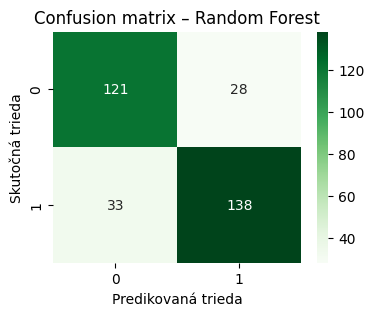

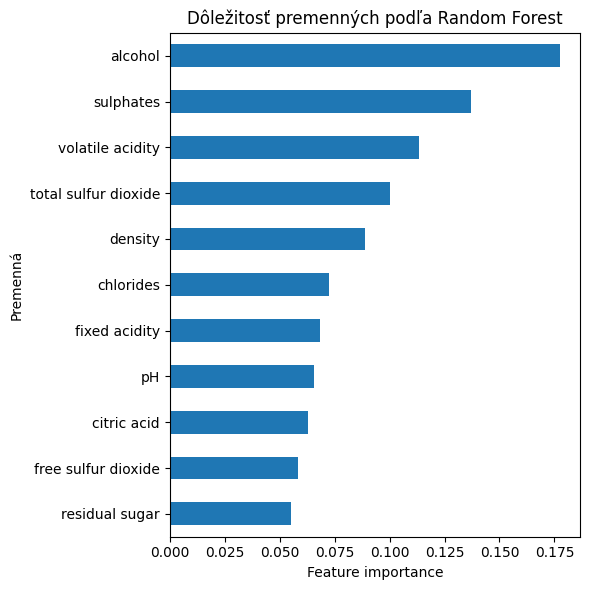


Top 10 najdôležitejších premenných podľa RF:
alcohol                 0.177728
sulphates               0.136851
volatile acidity        0.113564
total sulfur dioxide    0.100091
density                 0.088774
chlorides               0.072264
fixed acidity           0.068470
pH                      0.065669
citric acid             0.063083
free sulfur dioxide     0.058454
dtype: float64


In [13]:
df["quality_binary"] = (df["quality"] >= 6).astype(int)

X = df.drop(columns=["quality", "quality_binary"])
y = df["quality_binary"]

# ============================================
# 2. Rozdelenie dát na train / test
# ============================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================================
# 3. Logistická regresia (baseline model)
# ============================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# natrénovanie modelu
logreg_pipeline.fit(X_train, y_train)

# predikcia na testovacej množine
y_pred_logreg = logreg_pipeline.predict(X_test)

print("===== Logistická regresia =====")
print("Accuracy (test):", accuracy_score(y_test, y_pred_logreg))
print("\nClassification report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_logreg))


# (voliteľné) grafická confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(4,3))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix – logistická regresia")
plt.xlabel("Predikovaná trieda")
plt.ylabel("Skutočná trieda")
plt.show()


# ============================================
# 4. Random Forest classifier
# ============================================
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n===== Random Forest =====")
print("Accuracy (test):", accuracy_score(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion matrix – Random Forest")
plt.xlabel("Predikovaná trieda")
plt.ylabel("Skutočná trieda")
plt.show()


# ============================================
# 5. Dôležitosť premenných (feature importance)
# ============================================
import pandas as pd

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(6,6))
importances_sorted.plot(kind="barh")
plt.title("Dôležitosť premenných podľa Random Forest")
plt.xlabel("Feature importance")
plt.ylabel("Premenná")
plt.tight_layout()
plt.show()

print("\nTop 10 najdôležitejších premenných podľa RF:")
print(importances.sort_values(ascending=False).head(10))

# druhy pokus

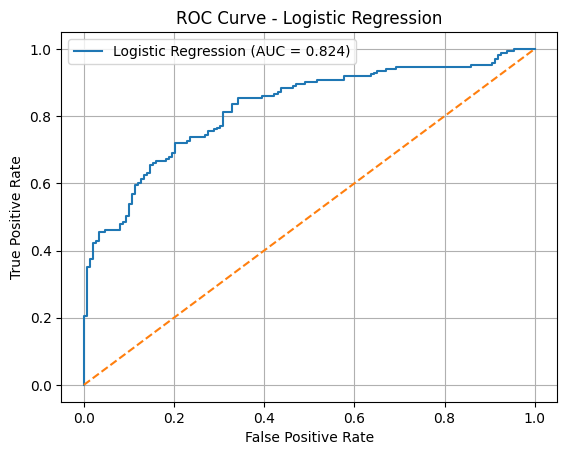

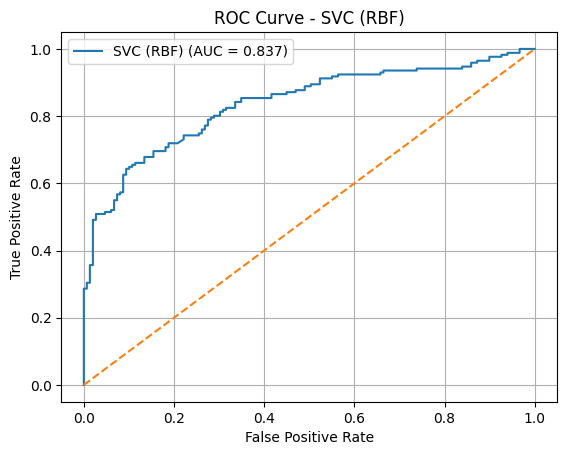

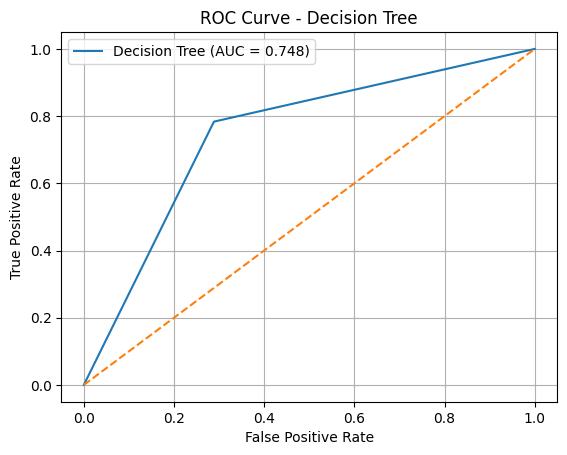

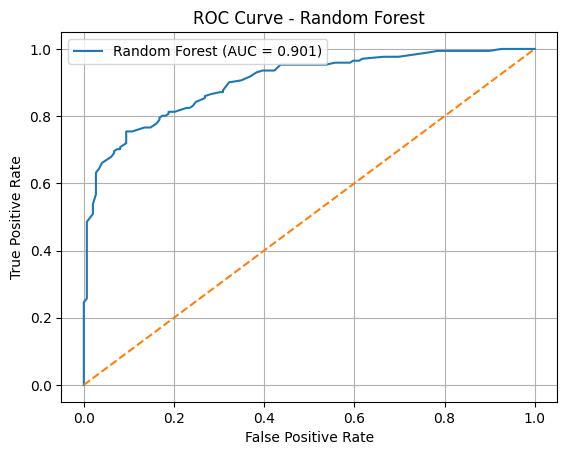

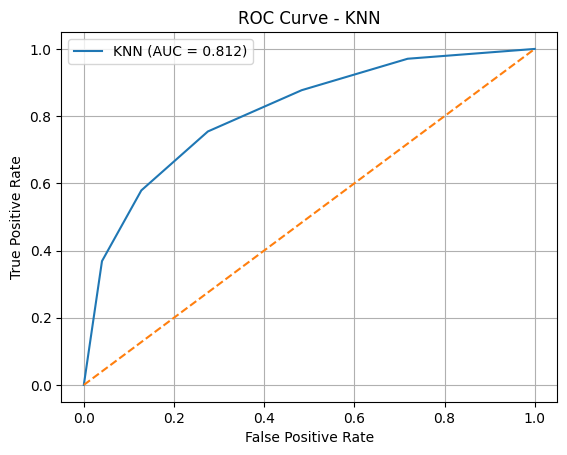

c:\Users\szscb\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


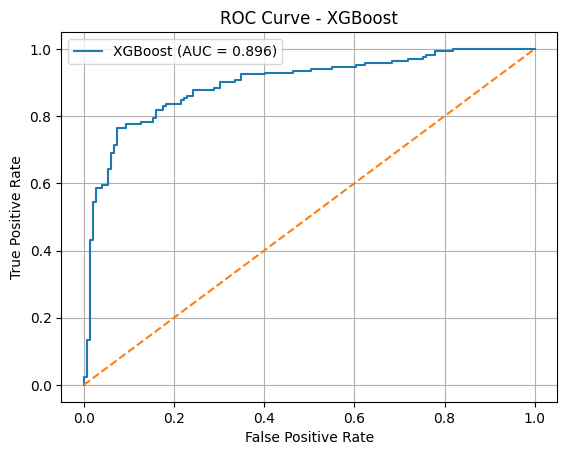

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVC (RBF)": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Get probability predictions
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    # Plot
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    plt.plot([0,1], [0,1], linestyle="--")  # random guess line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Optimalizácia parametrov 

In [15]:
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"],
        "max_iter": [500]
    },
    
    "SVC": {
        "C": [0.1, 1, 3, 10],
        "kernel": ["rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    
    "Random Forest": {
        "n_estimators": [200, 400, 600],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    },
    
    "KNN": {
        "n_neighbors": [3, 5, 7, 11, 15],
        "weights": ["uniform", "distance"],
        "p": [1, 2]  # Manhattan vs Euclidean
    },
    "XGBoost": {
        "n_estimators": [200, 400],
        "learning_rate": [0.03, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False)
}

results = []

for name in models:
    print(f"\nOptimizing {name} ...")
    
    grid = GridSearchCV(
        models[name],
        param_grids[name],
        scoring="accuracy",
        cv=5,
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_score = grid.best_score_
    test_accuracy = best_model.score(X_test, y_test)
    
    results.append([name, best_score, test_accuracy, best_params])



Optimizing Logistic Regression ...

Optimizing SVC ...

Optimizing Decision Tree ...

Optimizing Random Forest ...

Optimizing KNN ...

Optimizing XGBoost ...


c:\Users\szscb\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:30:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
results_df = pd.DataFrame(results, columns=[
    "Model", "Best CV Accuracy", "Test Accuracy", "Best Parameters"
])

results_df

,Model,Best CV Accuracy,Test Accuracy,Best Parameters
0,Logistic Regression,0.741229,0.737500,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l2', '..."
1,SVC,0.765447,0.759375,"{'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}"
2,Decision Tree,0.738879,0.759375,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
3,Random Forest,0.812362,0.796875,"{'max_depth': None, 'min_samples_split': 2, 'n..."
4,KNN,0.791256,0.812500,"{'n_neighbors': 15, 'p': 2, 'weights': 'distan..."
5,XGBoost,0.804556,0.825000,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."


In [19]:
best_params = {}
for i, row in results_df.iterrows():
    best_params[row["Model"]] = row["Best Parameters"]
best_params

{'Logistic Regression': {'C': 0.1,
  'max_iter': 500,
  'penalty': 'l2',
  'solver': 'lbfgs'},
 'SVC': {'C': 3, 'gamma': 'scale', 'kernel': 'rbf'},
 'Decision Tree': {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Random Forest': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 600},
 'KNN': {'n_neighbors': 15, 'p': 2, 'weights': 'distance'},
 'XGBoost': {'colsample_bytree': 0.8,
  'learning_rate': 0.03,
  'max_depth': 7,
  'n_estimators': 200,
  'subsample': 0.8}}

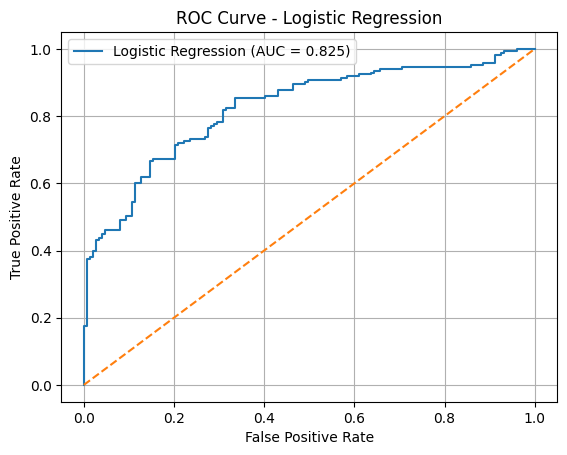

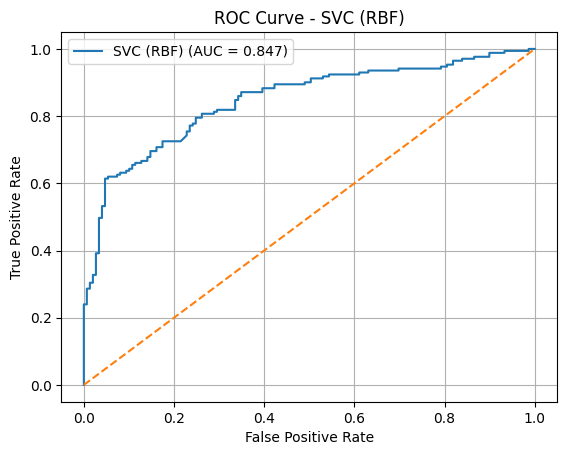

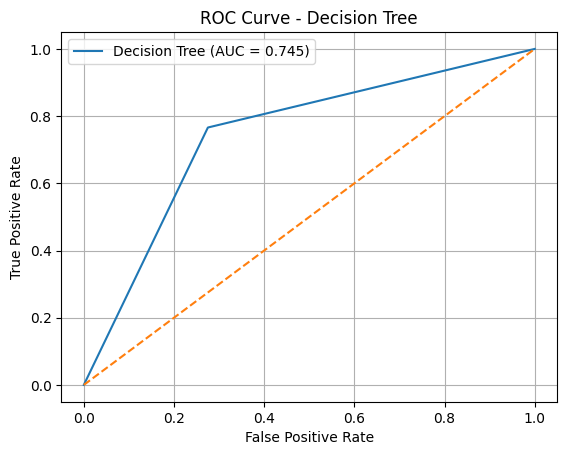

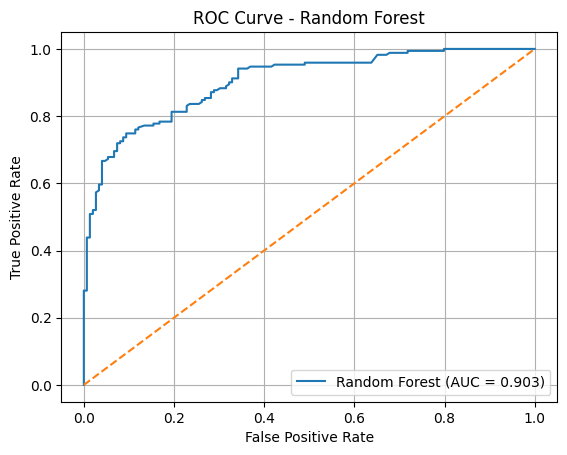

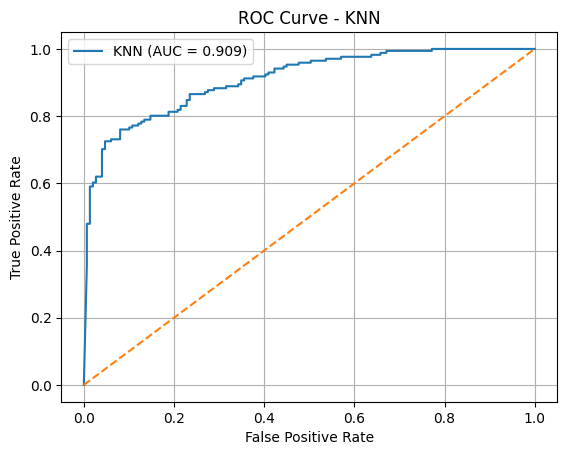

c:\Users\szscb\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:30:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


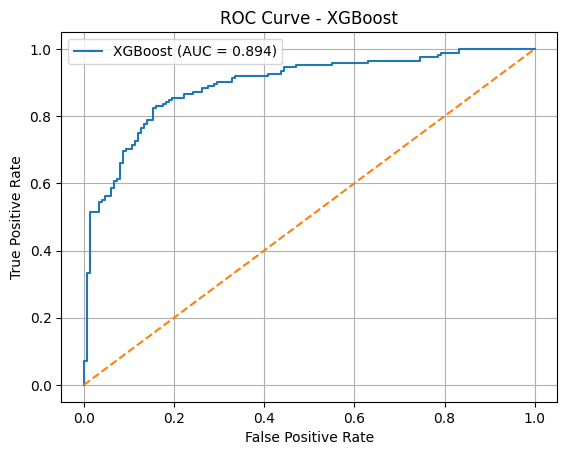

                     Accuracy  Acurracy from ROC
Logistic Regression  0.737500           0.824601
SVC (RBF)            0.759375           0.846854
Decision Tree        0.746875           0.745457
Random Forest        0.803125           0.903156
KNN                  0.812500           0.909239
XGBoost              0.825000           0.893795


In [20]:
### Final evaluation with best parameters  and ROC curves ###


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
accuracy_scores = {}

models = {
    "Logistic Regression": LogisticRegression(**best_params["Logistic Regression"]),
    "SVC (RBF)": SVC(probability = True, **best_params["SVC"]),
    "Decision Tree": DecisionTreeClassifier(**best_params["Decision Tree"]),
    "Random Forest": RandomForestClassifier(**best_params["Random Forest"]),
    "KNN": KNeighborsClassifier(**best_params["KNN"]),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',**best_params["XGBoost"])
}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Get probability predictions
    y_prob = model.predict_proba(X_test)[:, 1]
    # Compute ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    accuracy_scores[name] = (model.score(X_test, y_test),auc)
    # Plot
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    plt.plot([0,1], [0,1], linestyle="--")  # random guess line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.grid(True)
    plt.show()
accuracy_scores = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy', 'Acurracy from ROC'])
print(accuracy_scores)